# Filtering the Pancealab Twitter Dataset

The dataset available on the Pancealab [github repo](https://github.com/thepanacealab/covid19_twitter) is very large
and analysing it in its entirety would be expensive, lengthy and out of scope for the project. Instead using this notebook,
we can filter the files by selecting a number of tweets and a number of languages. It was decided that 1000 from 4 languages
would suffice for this part of the project. Later on two more languages are added.

In [1]:
import pandas as pd
from tqdm.notebook import tqdm

valid_languages = ['en', 'es', 'fr', 'de']

In [2]:
import importlib
import matplotlib.pyplot as plt
import os
import sys
from multiplex import drawable

drawable = importlib.reload(drawable)
# reload the style
plt.style.use(os.path.join(sys.path[0], 'styles', "multiplex-dark.style"))

def pie(data, labelname, figname):
    figure = plt.figure(figsize=(5, 5))
    viz = drawable.Drawable(figure)
    temp = data[labelname].value_counts()
    df = pd.DataFrame({'labels': [str(temp.values.tolist()[i]) + ' ' + l for i, l in enumerate(temp.index)],
                       'values': temp.values
                       })

    labels = df['labels']
    sizes = df['values']
    patches, texts = viz.pie(sizes, shadow=True, startangle=90, pctdistance=1.1, labeldistance=1.2)
    plt.legend(patches, labels, loc="right")
    viz.axis('equal')
    viz.set_title(figname, loc='left')
    viz.savefig(fname='Output/'+figname,dpi=300, bbox_inches='tight')

In this cell we go over the files in the ProcessOrNot/Data/pancealab/ folder and extract 1000 tweets for each language
chosen.

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

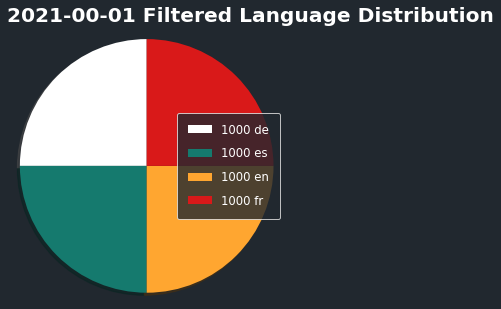

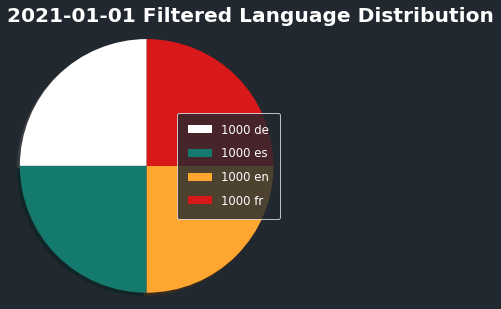

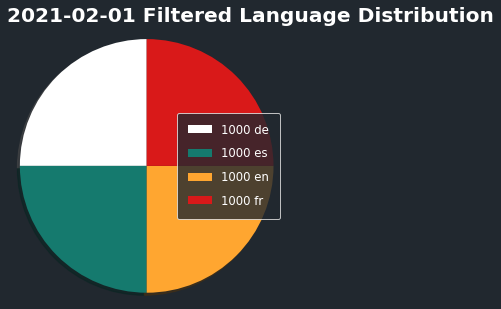

In [3]:
files = ['Data/pancealab/2021-01-01_clean-dataset.tsv',
         'Data/pancealab/2021-02-01_clean-dataset.tsv',
         'Data/pancealab/2021-03-01_clean-dataset.tsv']

for i, f in enumerate(files):
    data = pd.read_csv(f, sep='\t')
    v_counts = data['lang'].value_counts()
    valid_data = pd.DataFrame(columns=data.columns)
    lang_indices = {}
    # add each index to its label
    languages = data["lang"]
    for j, lang in tqdm(enumerate(languages)):
        if lang in valid_languages:
            if lang not in lang_indices:
                lang_indices[lang] = []
            lang_indices[lang].append(j)
    for lang in valid_languages:
        valid_data = valid_data.append(data.iloc[lang_indices[lang][:1000]])
    v_counts = valid_data['lang'].value_counts()
    pie(valid_data, 'lang', '2021-0'+str(i)+'-01 Filtered Language Distribution')
    valid_data.to_csv('Data/FilteredTwitterIDs/' + str(i) + '.csv')